# Predicting Heart Failure: A Comparison of Key ML Models

Cardiovascular diseases are the number 1 cause of death globally, being responsible of an estimated 17.9 million deaths per year (31% deaths worldwide).

Early detection can be key to prevent the evolution of the disease and death, thus machine learning approaches have shown strong performance, finding and detecting patterns in large datasets, allowing for the prediction of cardiovascular diseases.

In this project several machine learning approaches will be tested to classify patients into an outcome variable (death_event). The machine learning algorithms to be tested are:
- K-nearest neighbour
- Logistic regression
- Decision tree
- Random forest
- Support vector machine

Let's dive into this project!

### Import packages

In [429]:
# !pip install pandas numpy scikit-learn matplotlib seaborn

In [430]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

### Load the data and check for missing values

Firstly, the data will be imported as a pandas dataframe, as it provides an intuitive and efficient way to manipulate and work with structured data.

The dataset contains several features:
- age → in years
- anaemia → decrease of red blood cells or hemoglobin (boolean: 0 (no) or 1 (yes))
- creatinine_phosphokinase → Level of the CPK enzyme in the blood (mcg/L)
- diabetes → if the patient has diabetes (boolean: 0 (no) or 1 (yes))
- ejection_fraction → Percentage of blood leaving the heart at each contraction (%)
- high_blood_pressure → if the patient has hypertension (boolean: 0 (no) or 1 (yes))
- platelets → platelets in the blood (kiloplateletes/mL)
- serum_creatinine → level of serum creatinine in the blood (mg/dL)
- serum_sodium → level of serum sodium in the blood (mEq/L)
- sex → gender of the patient (boolean: 0 (woman) or 1 (man))
- smoking → if the patient smokes (boolean: 0 (no) or 1 (yes))
- time → follow-up period (days)

With a target column:
- DEATH_EVENT → if the patient died during the follow-up period (boolean: 0 (no) or 1 (yes))

In [431]:
raw_data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("First 5 records:")
raw_data.head()

First 5 records:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Once the data is imported correctly, let's have a general look at it to see what we are working with. For this, 2 pandas dataframe methods will be used: df.describe() and df.info().

In [432]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


df.info() has provided a summary of the number of entries for each feature or column and the designated data type. However, it might be beneficial to have a deeper look into the data, to see the actual entries, to discern between boolean variables and integer variables. That's where the df.describe() method comes in handy:

In [433]:
raw_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Looking at the "count" row, there is no missing values for any of the columns. Let's verify that:

In [434]:
print("Number of empty slots per column:")
print(raw_data.isnull().sum(axis = 0))
print("")
print("Number of N/A:")
print(raw_data.isna().sum(axis = 0))

Number of empty slots per column:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Number of N/A:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


Once verified that:
1. The data type corresponding to each feature is assigned properly.
2. There is no missing data.

We can proceed to the exploratory data analysis.

### Exploratory data analysis

One of the most common assumptions in statistics and data science is that the varible to work with follows a normal distribution. To check this, let's plot histograms for all non-categorical variables: age, creatinine_phosphokinase, ejection_fraction, platelets, serum_creatinine, serum_sodium, and time.

Firstly, let's create a copy of the data, so the original dataset stays unchanged.

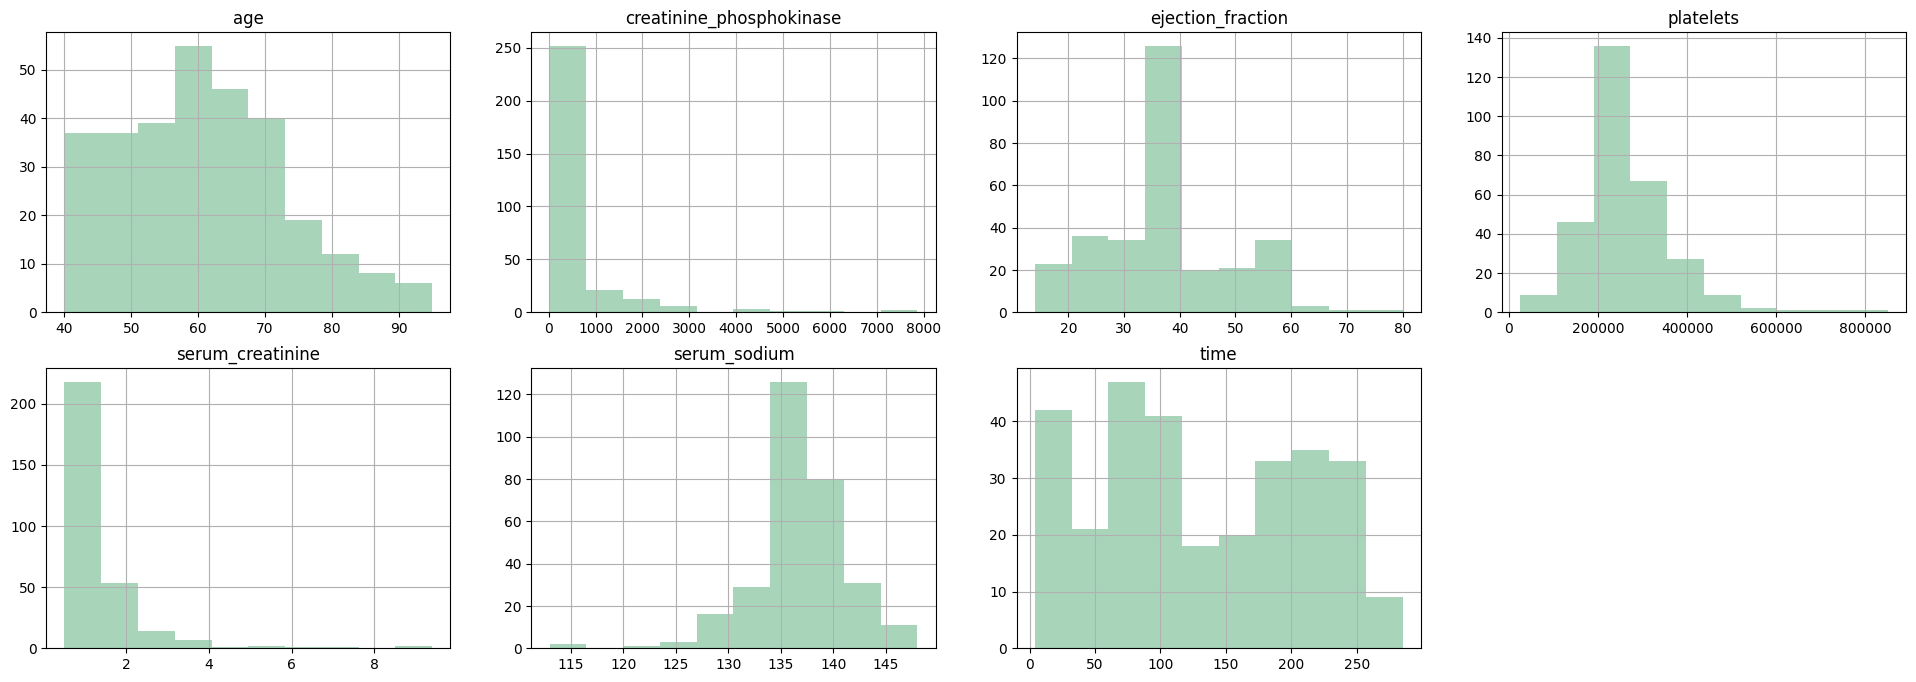

In [435]:
# Copy raw_data
data = raw_data.copy()

# Set up plot layout configuration
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
axes = axes.flatten()

# Define continuous columns and plot histograms
continuous_colums = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium", "time"]
for i, col in enumerate(continuous_colums):
    ax = axes[i]
    data[col].hist(ax=ax, color = '#A8D5BA')
    ax.set_title(col)

# Delete extra subplot
if len(continuous_colums) < len(axes):
    for j in range(len(continuous_colums), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout
plt.show()

As shown in the histograms above, many data variables show a skewed distribution. One approach to correct for this is to apply a logistic function to the data.

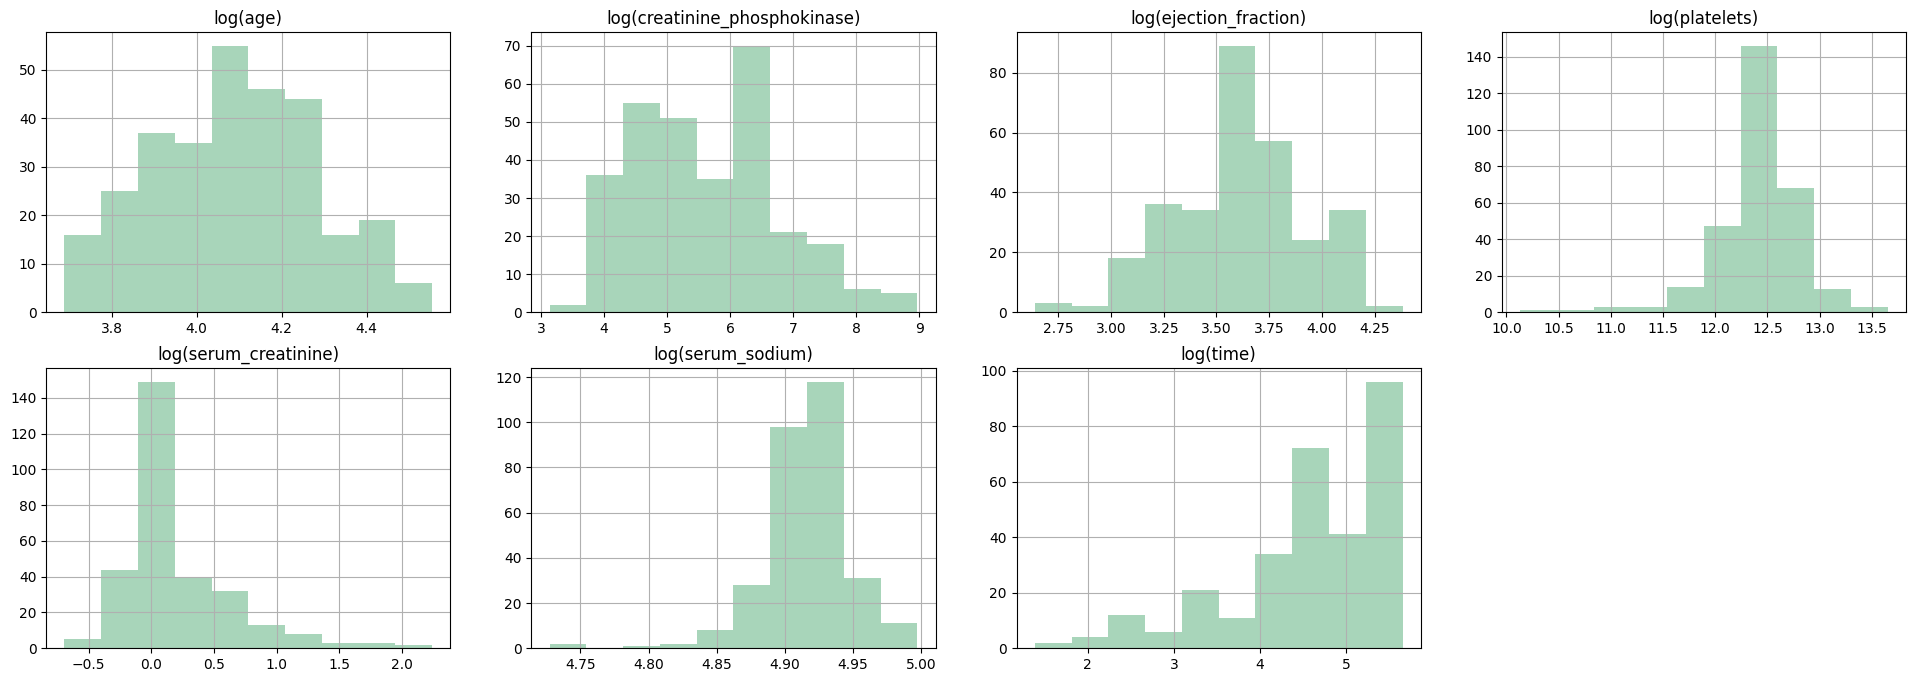

In [436]:
# Set up plot layout configuration
fig, axes = plt.subplots(2, 4, figsize=(24, 8))
axes = axes.flatten()

# Apply logistic transformation and plot histograms
for i, col in enumerate(continuous_colums):
    ax = axes[i]
    np.log(data[col]).hist(ax=ax, color = '#A8D5BA')
    ax.set_title(f'log({col})')

# Delete extra subplot
if len(continuous_colums) < len(axes):
    for j in range(len(continuous_colums), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout
plt.show()

After applying the logistic transformation, the skew in the features has been reduced, with the exception of the 'time' variable. Therefore, the 'time' variable will not transformed. 

In [437]:
cont_cols_no_time = continuous_colums[:-1]
print(cont_cols_no_time)
for col in cont_cols_no_time:
    data[col] = np.log(data[col].astype(float))

data.head()

['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,4.317488,0,6.366470,0,2.995732,1,12.487485,0.641854,4.867534,1,0,4,1
1,4.007333,0,8.969669,0,3.637586,0,12.481270,0.095310,4.912655,1,0,6,1
2,4.174387,0,4.983607,0,2.995732,0,11.995352,0.262364,4.859812,1,1,7,1
3,3.912023,1,4.709530,0,2.995732,0,12.254863,0.641854,4.919981,1,0,7,1
4,4.174387,1,5.075174,1,2.995732,0,12.697715,0.993252,4.753590,0,0,8,1


Let's have a look at the target column, is the dataset balanced?

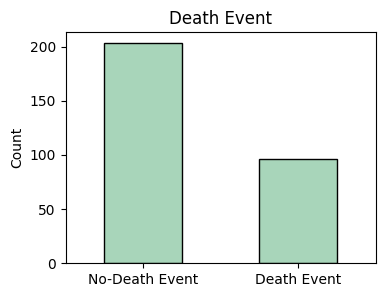

,Counts,Percentage
DEATH_EVENT,,
0,203,67.9%
1,96,32.1%


In [438]:
# Getting the count and percentage column by using target column
plt.figure(figsize=(4, 3))
data.DEATH_EVENT.value_counts().sort_index().plot(kind='bar', 
                                                  color='#A8D5BA',
                                                  edgecolor='black')
plt.xlabel('')
plt.ylabel('Count')
plt.title('Death Event')
plt.xticks([0, 1], ['No-Death Event', 'Death Event'], rotation=0)
plt.show()

counts = data.DEATH_EVENT.value_counts()
percentage = data.DEATH_EVENT.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Counts':counts,'Percentage': percentage})

As seen above, the dataset is not balanced, therefore class balancing strategies might be applied to the different classification algorithms, such as implementing a weighted loss function, or using the F1 score as evaluating metric

Let's split the dataset into training, validation, and test sets:

In [439]:
data_x = data.drop('DEATH_EVENT', axis = 1)
data_y = data.loc[:,'DEATH_EVENT']

X_dev, X_test, y_dev, y_test = sklearn.model_selection.train_test_split(data_x, data_y, test_size= 0.30, random_state = 1911)

X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_dev, y_dev, test_size= len(X_test)/len(X_dev), random_state = 1911)


print('Size of training set:', len(X_train))
print('Size of validation set:', len(X_val))
print('Size of test set:', len(X_test))

Size of training set: 119
Size of validation set: 90
Size of test set: 90


Now, mean-normalize the data using the 'StandardScaler()' from scikit-learn.

In [440]:
scaler = StandardScaler()

# Fit the scaling into the training set
X_train_scaled = scaler.fit_transform(X_train)

# Apply the mean-normalization to validation and test sets
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

With the data ready let's start modelling!

### K-Nearest Neighbor (KNN)

The first algorithm to be tested is KNN. This algorithm falls under the machine learning class of supervised learning. The goal of KNN is to predict the label of a new data point based on the majority, or average, of its k nearest neighbors.

While this algorithm is quite simple, it is very useful for several tasks, such as pattern recognition, or medical diagnosis.

Let's dive in!

In [441]:
# Basic fitting
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In the previous cell a basic KNN model has been trained, fitting the model to the training data, and leveraging the 5 closest neighbors for its predictions. Let's compute some evaluation metrics for this model by testing it againts the test data.

In [442]:
from sklearn.metrics import classification_report

knn_y_pred = knn.predict(X_test_scaled)
print(classification_report(y_test, knn_y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75        64
           1       0.39      0.42      0.41        26

    accuracy                           0.64        90
   macro avg       0.58      0.58      0.58        90
weighted avg       0.65      0.64      0.65        90



The fitted model is far from performing perfectly. One observation is that it shows better performance with patients with not 'DEATH_EVENT', possibly due to the unbalanced nature of the dataset. 

Now let's finetune the hyperparameters. We will compare 2 different approaches: manual fine-tuning vs. automatic 'GridSearchCV()' fine-tuning.

Note that 'GridSearchCV()' already applies cross-validation inside the training set, thus there is not need to manually slice out a validation set for hyperparameter fine-tuning.

In [443]:
# Manual fine-tuning
from sklearn.metrics import f1_score

# Hyperparameter tuning for KNN
best_manual_knn_params = {}
best_manual_knn_score = 0

for k in range(1, 21):
    for weights in ['uniform', 'distance']:
        for p in [1, 2]:  # 1 = Manhattan, 2 = Euclidean
            knn = KNeighborsClassifier(n_neighbors=k, weights=weights, p=p)
            knn.fit(X_train_scaled, y_train)
            knn_y_pred_val = knn.predict(X_val_scaled)
            f1 = f1_score(y_val, knn_y_pred_val)
            print(f'K={k}, weights={weights}, p={p} → F1: {f1*100:.2f}%')
            
            if f1 > best_manual_knn_score:
                best_manual_knn_score = f1
                best_manual_knn_params = {'n_neighbors': k, 'weights': weights, 'p': p}
print('')
print(f'Best Params: {best_manual_knn_params} with F1: {best_manual_knn_score*100:.2f}%')


K=1, weights=uniform, p=1 → F1: 63.16%
K=1, weights=uniform, p=2 → F1: 51.72%
K=1, weights=distance, p=1 → F1: 63.16%
K=1, weights=distance, p=2 → F1: 51.72%
K=2, weights=uniform, p=1 → F1: 60.47%
K=2, weights=uniform, p=2 → F1: 37.84%
K=2, weights=distance, p=1 → F1: 63.16%
K=2, weights=distance, p=2 → F1: 51.72%
K=3, weights=uniform, p=1 → F1: 65.38%
K=3, weights=uniform, p=2 → F1: 62.75%
K=3, weights=distance, p=1 → F1: 65.38%
K=3, weights=distance, p=2 → F1: 64.00%
K=4, weights=uniform, p=1 → F1: 58.33%
K=4, weights=uniform, p=2 → F1: 52.38%
K=4, weights=distance, p=1 → F1: 65.38%
K=4, weights=distance, p=2 → F1: 61.54%
K=5, weights=uniform, p=1 → F1: 60.38%
K=5, weights=uniform, p=2 → F1: 53.06%
K=5, weights=distance, p=1 → F1: 59.26%
K=5, weights=distance, p=2 → F1: 52.00%
K=6, weights=uniform, p=1 → F1: 48.89%
K=6, weights=uniform, p=2 → F1: 48.89%
K=6, weights=distance, p=1 → F1: 69.23%
K=6, weights=distance, p=2 → F1: 58.82%
K=7, weights=uniform, p=1 → F1: 54.17%
K=7, weights=

In [444]:
# GridSearchCV() fine-tuning
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(2, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

from sklearn.metrics import f1_score, make_scorer

f1 = make_scorer(f1_score , average='macro')

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring= 'f1')
grid.fit(X_train_scaled, y_train)

print("Best params:", grid.best_params_)


Best params: {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


The two approaches returned different best parameters for the given data. Let's compare their performance on the test set:

In [445]:
# Manually-tuned model prediction
knn = KNeighborsClassifier(**best_manual_knn_params)
knn.fit(X_train_scaled, y_train)

knn_test_pred = knn.predict(X_test_scaled)

print('Manually-tuned model performance: \n', classification_report(y_test, knn_test_pred))

# Automatic GridSearchCV()-tuned model prediction
best_knn = grid.best_estimator_
knn_best_y_test_pred = best_knn.predict(X_test_scaled)
print('GridSearch()-tuned model performance: \n', classification_report(y_test, knn_best_y_test_pred))

Manually-tuned model performance: 
               precision    recall  f1-score   support

           0       0.79      0.72      0.75        64
           1       0.44      0.54      0.48        26

    accuracy                           0.67        90
   macro avg       0.62      0.63      0.62        90
weighted avg       0.69      0.67      0.68        90

GridSearch()-tuned model performance: 
               precision    recall  f1-score   support

           0       0.81      0.69      0.75        64
           1       0.44      0.62      0.52        26

    accuracy                           0.67        90
   macro avg       0.63      0.65      0.63        90
weighted avg       0.71      0.67      0.68        90



As seen above the hyperparameters returned by the 'GridSearchCV()' cross-validation approach showed slightly better performance and more homogeneous between the two categories. Therefore, the rest of models will be fine-tuned using this approach, and the 'X_dev' set instead of the 'X_train' set.

In [446]:
# Scaling based on X_dev set
dev_scaler = StandardScaler()

# Fit the scaling into the training set
X_dev_scaled = dev_scaler.fit_transform(X_dev)

# Apply the mean-normalization to test set
X_test_scaled = dev_scaler.transform(X_test)

# GridSearchCV() fine-tuning
param_grid = {
    'n_neighbors': range(2, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1')
grid.fit(X_dev_scaled, y_dev)

print("Best params:", grid.best_params_)

# Evaluate on test set
best_knn = grid.best_estimator_
knn_best_y_test_pred = best_knn.predict(X_test_scaled)
print('GridSearch()-tuned model performance: \n', classification_report(y_test, knn_best_y_test_pred))


Best params: {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}
GridSearch()-tuned model performance: 
               precision    recall  f1-score   support

           0       0.78      0.88      0.82        64
           1       0.56      0.38      0.45        26

    accuracy                           0.73        90
   macro avg       0.67      0.63      0.64        90
weighted avg       0.71      0.73      0.72        90



Let's visualize the resulting classification! For this multidimensional dataset, a PCA (Principal Component Analysis)-based approach seems adequate. This unsupervised learning algorithm is a dimensionality reduction technique commonly used as a preprocessing step in machine learning tasks, especially when working with high-dimensional datasets.

The goal of PCA is to reduce the number of features in the data while preserving as much variability as possible. It does this by finding new axes — called principal components — that capture the directions of maximum variance in the data. These components are linear combinations of the original features and are uncorrelated with each other.

PCA is widely used for data visualization, noise reduction, and improving model efficiency, particularly in fields like image analysis, genomics, and exploratory data analysis.

Here we will use it for data visualization purposes!

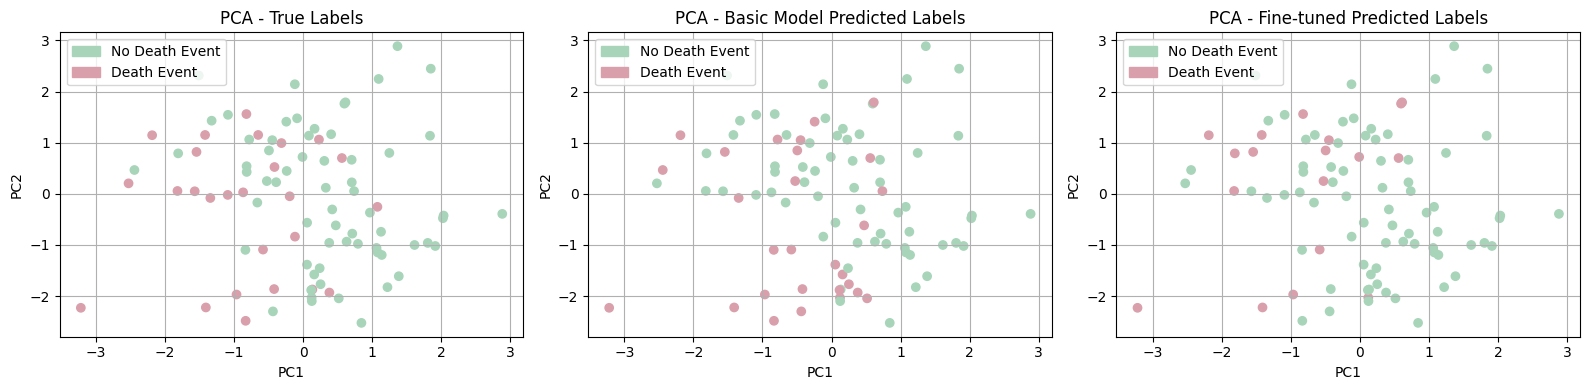

In [447]:
# PCA fitting and transforming
pca = PCA(n_components=2)
X_dev_pca = pca.fit_transform(X_dev_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Setting up subplot configuration
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

legend_elements = [
    mpatches.Patch(color='#A8D5BA', label='No Death Event'),
    mpatches.Patch(color='#D9A0AC', label='Death Event')
]

# Scatter plot of true labels
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[0].set_title('PCA - True Labels')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Add the legend
axes[0].legend(handles=legend_elements)

# Scatter plot of basic model predicted labels
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_y_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[1].set_title('PCA - Basic Model Predicted Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

# Add the legend
axes[1].legend(handles=legend_elements)

# Scatter plot of fine-tuned predicted labels
axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_best_y_test_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[2].set_title('PCA - Fine-tuned Predicted Labels')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True)

# Add the legend
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

### Logistic Regression

This supervised learning algorithm is particularly suited for classification problems.

The goal of Logistic Regression is to estimate the probability that a given input belongs to a particular class. It does this by applying the logistic (sigmoid) function to a linear combination of the input features, producing outputs between 0 and 1.

Despite its name, this algorithm is widely used for binary classification tasks, including areas like spam detection, credit scoring, and medical diagnosis.

Let’s dive in!

In [448]:
# Basic fitting
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(class_weight='balanced')
lg.fit(X_dev_scaled, y_dev)

# Evaluate basic model
lg_y_pred = lg.predict(X_test_scaled)
print(classification_report(y_test, lg_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        64
           1       0.65      0.65      0.65        26

    accuracy                           0.80        90
   macro avg       0.76      0.76      0.76        90
weighted avg       0.80      0.80      0.80        90



The basic logistic regression model performed similarly to the fine-tuned KNN model, achieving a similar scores. Let's see if by fine-tuning the logistic regression hyperparameters a better performance is achieved.

In [449]:
# Set up hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # inverse of regularization strength
    'penalty': ['l1', 'l2'],              # type of regularization
    'solver': ['liblinear']              # supports both l1 and l2
}

# Perform grid search
grid = GridSearchCV(LogisticRegression(max_iter=1000, class_weight='balanced'), param_grid, cv=5, scoring='f1')
grid.fit(X_dev_scaled, y_dev)

print("Best hyperparameters:", grid.best_params_)

# Evaluate on test set
best_lr = grid.best_estimator_
best_lr_y_test_pred = best_lr.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))


Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



After hyperparameter tuning, the performance of the model stayed quite similar. Let's visualize the subtle change with the PCA.

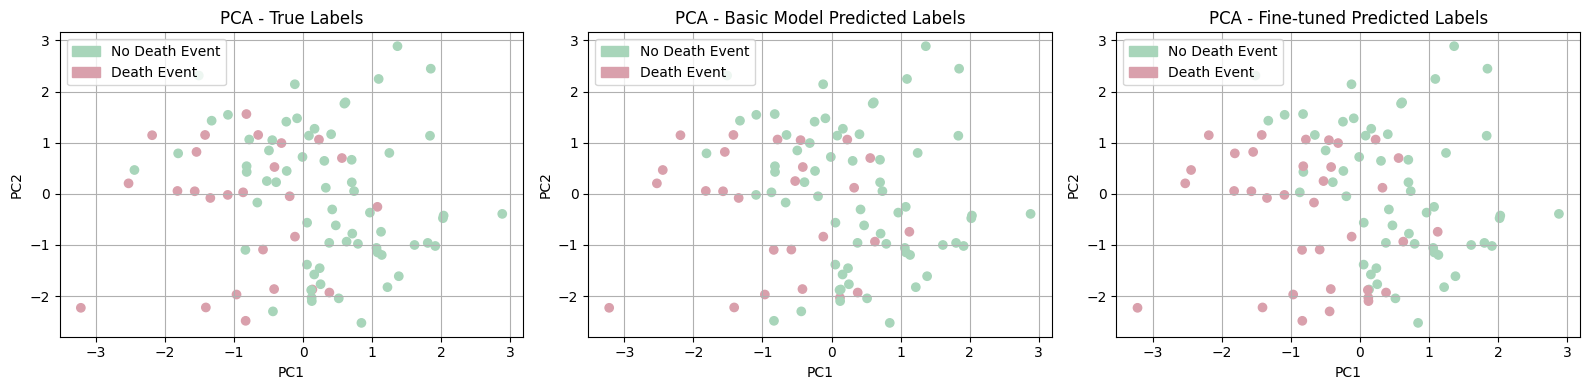

In [450]:
# Setting up subplot configuration
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

legend_elements = [
    mpatches.Patch(color='#A8D5BA', label='No Death Event'),
    mpatches.Patch(color='#D9A0AC', label='Death Event')
]

# Scatter plot of true labels
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[0].set_title('PCA - True Labels')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Add the legend
axes[0].legend(handles=legend_elements)

# Scatter plot of basic model predicted labels
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=lg_y_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[1].set_title('PCA - Basic Model Predicted Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

# Add the legend
axes[1].legend(handles=legend_elements)

# Scatter plot of fine-tuned predicted labels
axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=best_lr_y_test_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[2].set_title('PCA - Fine-tuned Predicted Labels')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True)

# Add the legend
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

### Decision Tree

This supervised learning algorithm is well-suited for both classification and regression tasks.

The goal of a Decision Tree is to learn simple decision rules from the data to predict the target variable. It works by splitting the dataset into branches based on feature values, creating a tree-like structure where each internal node represents a condition and each leaf node represents a prediction.

Decision Trees are popular for their interpretability and are widely used in fields like medical diagnosis, and customer segmentation.

Let’s dig in! 🌳


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        64
           1       0.67      0.54      0.60        26

    accuracy                           0.79        90
   macro avg       0.75      0.71      0.73        90
weighted avg       0.78      0.79      0.78        90



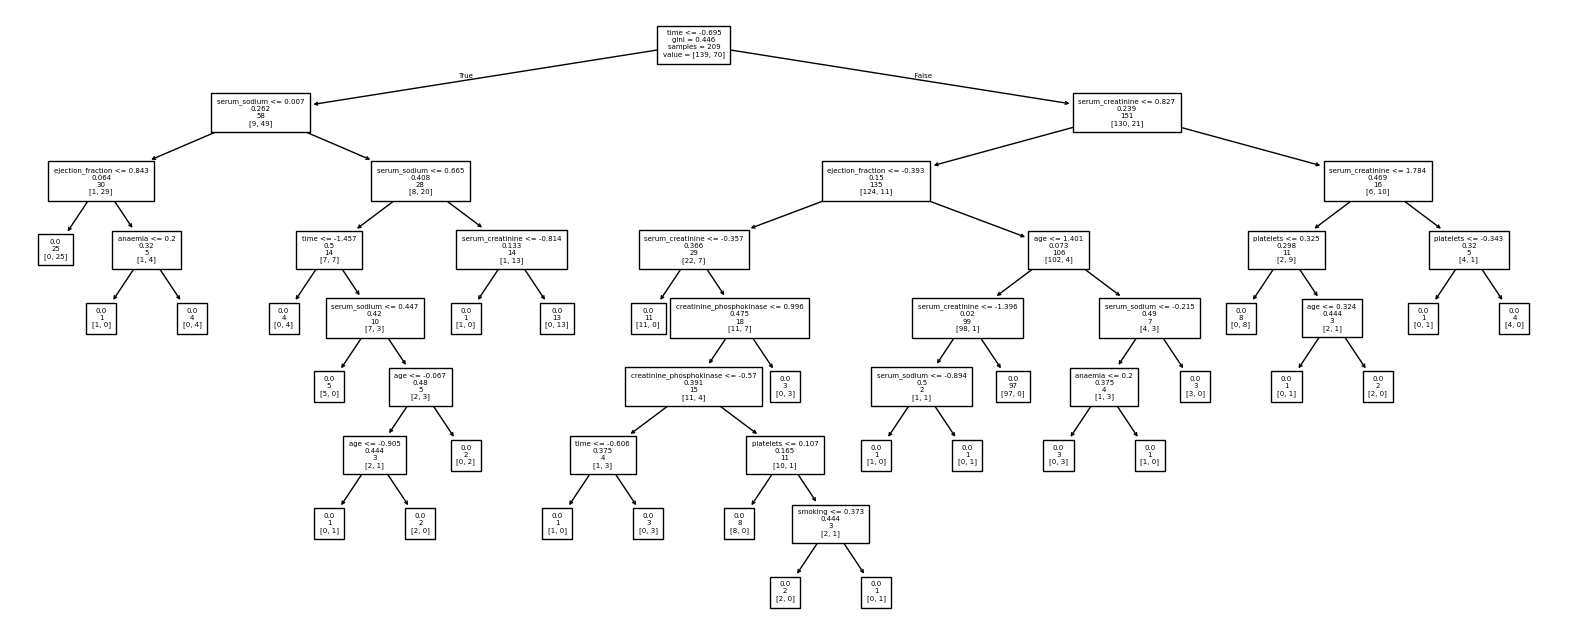

In [451]:
# Basic fitting
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree

dt = DecisionTreeClassifier(random_state=1911)
dt.fit(X_dev_scaled, y_dev)

# Evaluate basic model
dt_y_pred = dt.predict(X_test_scaled)
print(classification_report(y_test, dt_y_pred))

plt.figure(figsize=(20, 8))
sklearn.tree.plot_tree(dt, feature_names=data.columns,fontsize=5, label='root');

The above decision tree shows a weighted average f1 score of 0.78. Let's see if after hyperparameter tuning we can obtain a higher score.

Best hyperparameters: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



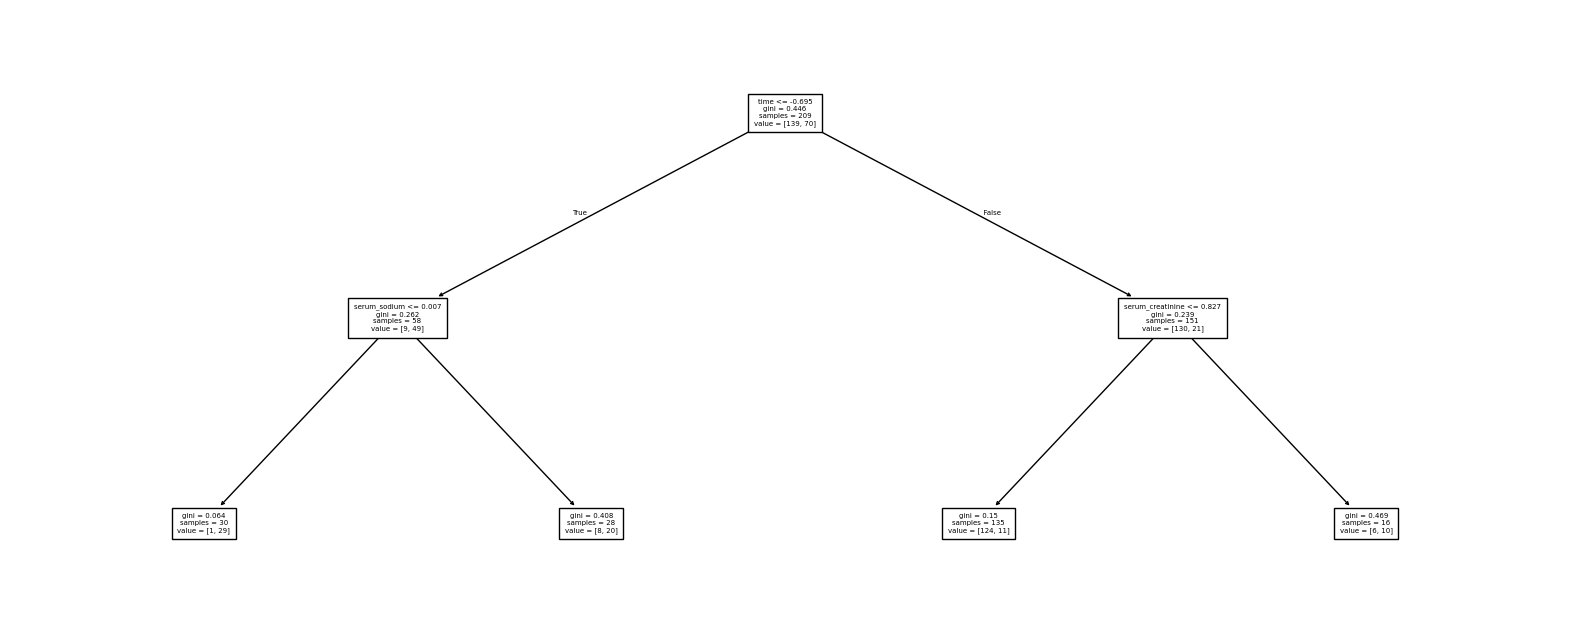

In [452]:
# Set up hyperparameter grid
param_grid = {
    'max_depth': range(2, 10),
    'min_samples_split': range(2, 11),
    'min_samples_leaf': range(1, 4),
    'criterion': ['gini', 'entropy']
}

# Perform grid search
grid = GridSearchCV(DecisionTreeClassifier(random_state=1911), param_grid, cv=5, scoring='f1')
grid.fit(X_dev_scaled, y_dev)

print("Best hyperparameters:", grid.best_params_)

# Evaluate on test set
best_dt = grid.best_estimator_
best_dt_y_test_pred = best_dt.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(20, 8))
sklearn.tree.plot_tree(best_dt, feature_names=data.columns,fontsize=5, label='all');

Although the weighted average f1 score is the same, the tuned decision tree is much more interpretable and simple, and still maintains the same performance! Is there any difference in the PCA scatters?

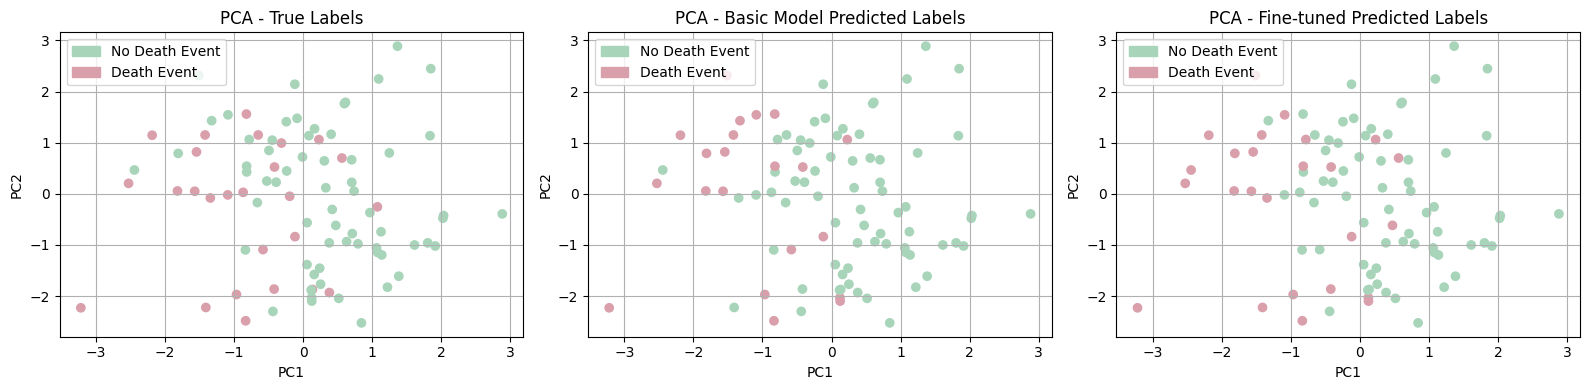

In [453]:
# Setting up subplot configuration
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

legend_elements = [
    mpatches.Patch(color='#A8D5BA', label='No Death Event'),
    mpatches.Patch(color='#D9A0AC', label='Death Event')
]

# Scatter plot of true labels
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[0].set_title('PCA - True Labels')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Add the legend
axes[0].legend(handles=legend_elements)

# Scatter plot of basic model predicted labels
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=dt_y_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[1].set_title('PCA - Basic Model Predicted Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

# Add the legend
axes[1].legend(handles=legend_elements)

# Scatter plot of fine-tuned predicted labels
axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=best_dt_y_test_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[2].set_title('PCA - Fine-tuned Predicted Labels')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True)

# Add the legend
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

### Random Forest

This supervised learning algorithm is powerful and flexible, suitable for both classification and regression tasks.

The goal of a Random Forest is to improve prediction accuracy and control overfitting by combining the results of many individual decision trees. Each tree is trained on a random subset of the data and features, and their combined predictions result in a more stable and robust model.

Random Forests are widely used in areas like medical risk prediction and recommendation systems — especially when accuracy and reliability are key.

Let’s dive in! 🌲

In [454]:
# Basic fitting
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1911)
rf.fit(X_dev_scaled, y_dev)

# Evaluate basic model
rf_y_pred = rf.predict(X_test_scaled)
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        64
           1       0.80      0.62      0.70        26

    accuracy                           0.84        90
   macro avg       0.83      0.78      0.80        90
weighted avg       0.84      0.84      0.84        90



The basic random forest already outperforms the fine-tuned algorithms tested before, achieving a score of 84%! Let's try to improve this by fine-tuning the model.

In [455]:
# !THIS CELL TAKES AROUND 20 MINUTES TO RUN!
# Set up hyperparameter grid
param_grid = {
    'n_estimators': [25, 50, 75, 100],     # number of trees
    'max_depth': [None] + list(range(2, 6)),    # max depth of each tree
    'min_samples_split': range(2, 6),           # minimum samples to split a node
    'min_samples_leaf': range(1, 4),            # minimum samples at a leaf node
    'max_features': [None, 'sqrt', 'log2']      # number of features considered at each split
}

# Perform grid search
grid = GridSearchCV(RandomForestClassifier(random_state=1911), param_grid, cv=5, scoring='f1')
grid.fit(X_dev_scaled, y_dev)

print("Best hyperparameters:", grid.best_params_)

# Evaluate on test set
best_rf = grid.best_estimator_
best_rf_y_test_pred = best_rf.predict(X_test_scaled)
print(classification_report(y_test, best_rf_y_test_pred))

Best hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



Let's have a look at the PCA scatters!

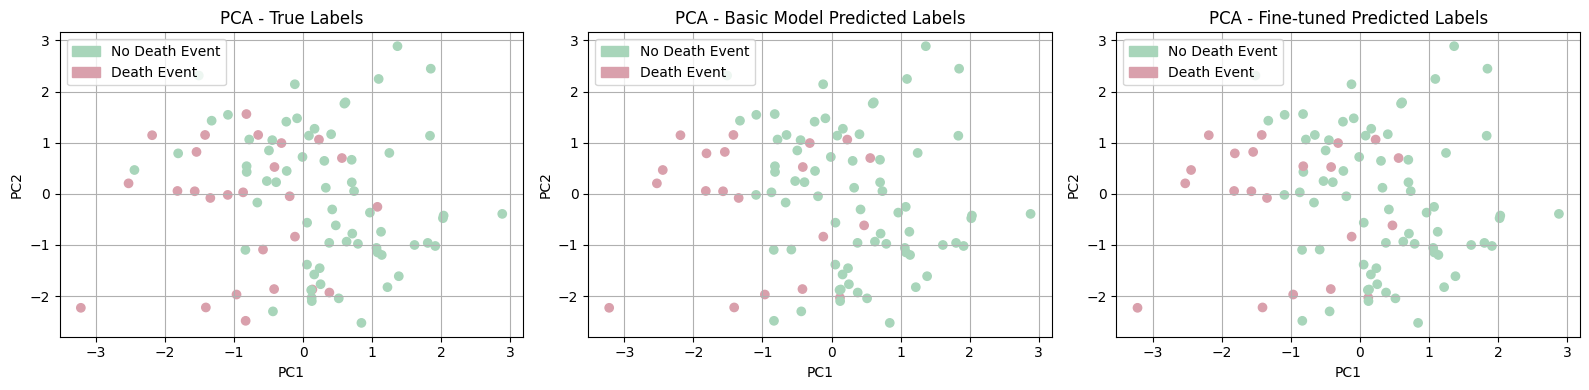

In [456]:
# Setting up subplot configuration
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

legend_elements = [
    mpatches.Patch(color='#A8D5BA', label='No Death Event'),
    mpatches.Patch(color='#D9A0AC', label='Death Event')
]

# Scatter plot of true labels
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[0].set_title('PCA - True Labels')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Add the legend
axes[0].legend(handles=legend_elements)

# Scatter plot of basic model predicted labels
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=rf_y_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[1].set_title('PCA - Basic Model Predicted Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

# Add the legend
axes[1].legend(handles=legend_elements)

# Scatter plot of fine-tuned predicted labels
axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=best_y_test_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[2].set_title('PCA - Fine-tuned Predicted Labels')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True)

# Add the legend
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

### Support Vector Machine

This supervised learning algorithm is a powerful tool for both classification and regression tasks, especially when dealing with complex or high-dimensional datasets.

The goal of a Support Vector Machine is to find the optimal hyperplane that separates data points of different classes with the maximum possible margin. It can handle linear and non-linear data using kernel functions, making it highly flexible in capturing intricate patterns.

SVMs are widely used in applications like image recognition, bioinformatics, and text classification due to their robustness and effectiveness, even with smaller datasets.

Let’s dive in! 🧠💻


In [457]:
# Basic fitting
from sklearn.svm import SVC

svm = SVC(random_state = 1911)
svm.fit(X_dev_scaled, y_dev)

# Evaluate basic model
svm_y_pred = svm.predict(X_test_scaled)
print(classification_report(y_test, svm_y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        64
           1       0.71      0.58      0.64        26

    accuracy                           0.81        90
   macro avg       0.78      0.74      0.76        90
weighted avg       0.80      0.81      0.80        90



In [458]:
# Set up hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],           # Regularization strength
    'gamma': ['scale', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']       # Kernel type
}

# Perform grid search
grid = GridSearchCV(SVC(random_state=1911), param_grid, cv=5, scoring='f1')
grid.fit(X_dev_scaled, y_dev)

print("Best hyperparameters:", grid.best_params_)

# Evaluate on test set
best_svm = grid.best_estimator_
best_svm_y_test_pred = best_svm.predict(X_test_scaled)
print(classification_report(y_test, best_svm_y_test_pred))

Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        64
           1       0.76      0.62      0.68        26

    accuracy                           0.83        90
   macro avg       0.81      0.77      0.78        90
weighted avg       0.83      0.83      0.83        90



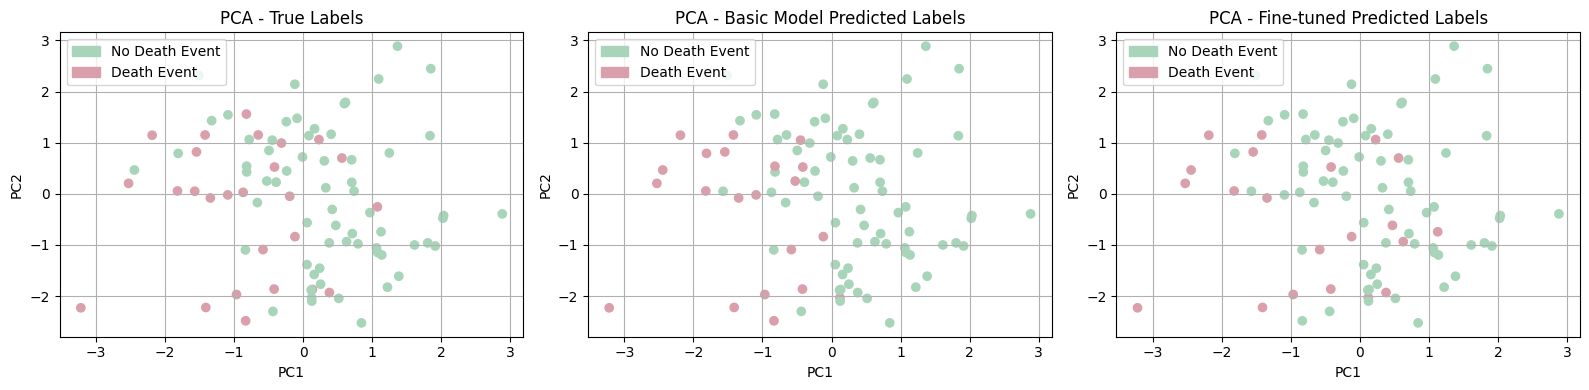

In [459]:
# Setting up subplot configuration
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
axes = axes.flatten()

legend_elements = [
    mpatches.Patch(color='#A8D5BA', label='No Death Event'),
    mpatches.Patch(color='#D9A0AC', label='Death Event')
]

# Scatter plot of true labels
axes[0].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[0].set_title('PCA - True Labels')
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')
axes[0].grid(True)

# Add the legend
axes[0].legend(handles=legend_elements)

# Scatter plot of basic model predicted labels
axes[1].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=svm_y_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[1].set_title('PCA - Basic Model Predicted Labels')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].grid(True)

# Add the legend
axes[1].legend(handles=legend_elements)

# Scatter plot of fine-tuned predicted labels
axes[2].scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=best_svm_y_test_pred, cmap=ListedColormap(['#A8D5BA', '#D9A0AC']), alpha=1)
axes[2].set_title('PCA - Fine-tuned Predicted Labels')
axes[2].set_xlabel('PC1')
axes[2].set_ylabel('PC2')
axes[2].grid(True)

# Add the legend
axes[2].legend(handles=legend_elements)

plt.tight_layout()
plt.show()

So, now that we have trained, fine-tuned, and visualized all these ML algorithms, the one that got the highest performance score is the SVM model, tied with the ranfom forest algorithm. Nonetheless, if we take into account the computational cost, the clear winner here would be SVM!